In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2018-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-02", tz="America/New_York").isoformat()

In [14]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["VOO", "MSFT", "AAPL", "BND", "AMT", "VUG", "TSLA", "AMZN", "EDV", "PLD"]

In [15]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

In [16]:
# Create the request of the data to fetch via the Alpaca SDK
diversified_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

diversified_prices_df

AAPL                                          \
                              open     high       low     close     volume   
time                                                                         
2018-01-02 00:00:00-05:00  170.160  172.300  169.2600  172.2600   20523941   
2018-01-03 00:00:00-05:00  172.530  174.550  171.9600  172.1800   23193409   
2018-01-04 00:00:00-05:00  172.540  173.470  172.0800  173.0200   17742231   
2018-01-05 00:00:00-05:00  173.440  175.370  173.0500  174.9600   18402859   
2018-01-08 00:00:00-05:00  174.310  175.610  173.9300  174.3400   15554212   
...                            ...      ...       ...       ...        ...   
2021-10-27 00:00:00-04:00  149.380  149.730  148.4900  148.8500   43068962   
2021-10-28 00:00:00-04:00  149.860  153.165  149.7200  152.4766   77772052   
2021-10-29 00:00:00-04:00  147.190  149.940  146.4128  149.8000  104258290   
2021-11-01 00:00:00-04:00  148.985  149.700  147.8000  148.9900   57758481   
2021-11-02 00:00:00-04:00  148.670  151.570  148.6500  150.0000   61741508   

                              AMT                                      ...  \
                             open    high     low    close     volume  ...   
time                                                                   ...   
2018-01-02 00:00:00-05:00  143.11  143.22  140.91  141.105  1391810.0  ...   
2018-01-03 00:00:00-05:00  141.05  142.50  140.86  141.570  1210542.0  ...   
2018-01-04 00:00:00-05:00  141.44  141.96  139.58  139.630  1037487.0  ...   
2018-01-05 00:00:00-05:00  140.23  140.70  139.59  140.490  1363577.0  ...   
2018-01-08 00:00:00-05:00  140.66  143.24  140.66  142.030  1350838.0  ...   
...                           ...     ...     ...      ...        ...  ...   
2021-10-27 00:00:00-04:00  288.22  291.17  285.31  285.380  1074165.0  ...   
2021-10-28 00:00:00-04:00  285.50  289.99  282.85  286.040  1162672.0  ...   
2021-10-29 00:00:00-04:00  284.23  284.93  279.64  281.710  1510135.0  ...   
2021-11-01 00:00:00-04:00  282.83  283.16  276.41  282.120  1197575.0  ...   
2021-11-02 00:00:00-04:00  282.81  285.29  279.51  282.650  1300858.0  ...   

                              VOO                                       \
                             open     high       low    close   volume   
time                                                                     
2018-01-02 00:00:00-05:00  246.15  247.030  245.7361  247.030  2235294   
2018-01-03 00:00:00-05:00  247.19  248.700  247.1800  248.560  2354148   
2018-01-04 00:00:00-05:00  249.27  250.120  249.1700  249.630  2314943   
2018-01-05 00:00:00-05:00  250.46  251.400  249.9500  251.250  1752711   
2018-01-08 00:00:00-05:00  251.16  251.880  250.8700  251.720  1929560   
...                           ...      ...       ...      ...      ...   
2021-10-27 00:00:00-04:00  419.66  420.290  417.2800  417.290  2684049   
2021-10-28 00:00:00-04:00  418.78  421.440  418.7500  421.315  3139789   
2021-10-29 00:00:00-04:00  419.15  422.515  418.8700  422.140  3983364   
2021-11-01 00:00:00-04:00  423.19  423.570  421.2800  423.010  3544932   
2021-11-02 00:00:00-04:00  423.15  424.960  423.0100  424.650  2754466   

                              VUG                                        
                             open     high       low   close     volume  
time                                                                     
2018-01-02 00:00:00-05:00  141.29  142.270  141.0524  142.25   984355.0  
2018-01-03 00:00:00-05:00  142.40  143.660  142.4000  143.56   653690.0  
2018-01-04 00:00:00-05:00  144.07  144.300  143.8548  143.95   703928.0  
2018-01-05 00:00:00-05:00  144.37  145.240  144.2899  145.20  1061025.0  
2018-01-08 00:00:00-05:00  145.12  145.730  145.0800  145.62   683662.0  
...                           ...      ...       ...     ...        ...  
2021-10-27 00:00:00-04:00  310.15  312.292  309.5439  309.57   571689.0  
2021-10-28 00:00:00-04:00  310.99  312.780  310.4500  312.68   7936

In [17]:
# Create a new empty DF that that holds only the closing prices of each stock
diversified_closing_prices_df = pd.DataFrame()

In [18]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  diversified_closing_prices_df[ticker] = diversified_prices_df[ticker]["close"]

diversified_closing_prices_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-02 00:00:00-05:00,247.030,85.91,172.2600,81.3200,141.105,142.25,320.29,1189.000,117.500,64.01
2018-01-03 00:00:00-05:00,248.560,86.33,172.1800,81.4000,141.570,143.56,317.01,1202.740,119.690,63.86
2018-01-04 00:00:00-05:00,249.630,87.12,173.0200,81.3500,139.630,143.95,314.62,1209.640,119.940,62.63
2018-01-05 00:00:00-05:00,251.250,88.11,174.9600,81.2400,140.490,145.20,316.55,1229.070,119.420,62.56
2018-01-08 00:00:00-05:00,251.720,88.22,174.3400,81.2600,142.030,145.62,336.41,1246.950,119.300,63.29
...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,417.290,323.14,148.8500,85.4800,285.380,309.57,1038.00,3393.325,139.975,143.86
2021-10-28 00:00:00-04:00,421.315,324.32,152.4766,85.3600,286.040,312.68,1077.09,3444.500,139.320,146.66
2021-10-29 00:00:00-04:00,422.140,331.64,149.8000,85.3399,281.710,314.19,1114.18,3372.430,139.560,144.86


In [19]:
# Calculate the daily returns for each of the stocks in the portfolio
diversified_daily_returns_df = diversified_closing_prices_df.pct_change().dropna()
diversified_daily_returns_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.006194,0.004889,-0.000464,0.000984,0.003295,0.009209,-0.010241,0.011556,0.018638,-0.002343
2018-01-04 00:00:00-05:00,0.004305,0.009151,0.004879,-0.000614,-0.013703,0.002717,-0.007539,0.005737,0.002089,-0.019261
2018-01-05 00:00:00-05:00,0.006490,0.011364,0.011213,-0.001352,0.006159,0.008684,0.006134,0.016063,-0.004336,-0.001118
2018-01-08 00:00:00-05:00,0.001871,0.001248,-0.003544,0.000246,0.010962,0.002893,0.062739,0.014548,-0.001005,0.011669
2018-01-09 00:00:00-05:00,0.002225,0.000113,-0.000057,-0.002892,-0.007393,0.002129,-0.008085,0.004948,-0.033697,-0.009954
...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,-0.004580,0.043363,-0.002747,0.003876,-0.005402,0.000711,0.019586,0.005165,0.024482,-0.016342
2021-10-28 00:00:00-04:00,0.009646,0.003652,0.024364,-0.001404,0.002313,0.010046,0.037659,0.015081,-0.004679,0.019463
2021-10-29 00:00:00-04:00,0.001958,0.022570,-0.017554,-0.000235,-0.015138,0.004829,0.034435,-0.020923,0.001723,-0.012273


In [20]:
# Calculate cumulative returns for the stocks portfolio
diversified_cumulative_returns_df = (1 + diversified_daily_returns_df).cumprod() - 1
diversified_cumulative_returns_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.006194,0.004889,-0.000464,0.000984,0.003295,0.009209,-0.010241,0.011556,0.018638,-0.002343
2018-01-04 00:00:00-05:00,0.010525,0.014085,0.004412,0.000369,-0.010453,0.011951,-0.017703,0.017359,0.020766,-0.021559
2018-01-05 00:00:00-05:00,0.017083,0.025608,0.015674,-0.000984,-0.004358,0.020738,-0.011677,0.033701,0.016340,-0.022653
2018-01-08 00:00:00-05:00,0.018986,0.026889,0.012075,-0.000738,0.006555,0.023691,0.050329,0.048738,0.015319,-0.011248
2018-01-09 00:00:00-05:00,0.021252,0.027005,0.012017,-0.003628,-0.000886,0.025870,0.041837,0.053928,-0.018894,-0.021090
...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,0.689228,2.761378,-0.135899,0.051156,1.022466,1.176239,2.240813,1.853932,0.191277,1.247461
2021-10-28 00:00:00-04:00,0.705522,2.775113,-0.114846,0.049680,1.027143,1.198102,2.362859,1.896972,0.185702,1.291204
2021-10-29 00:00:00-04:00,0.708861,2.860319,-0.130384,0.049433,0.996457,1.208717,2.478660,1.836358,0.187745,1.263084


<AxesSubplot:title={'center':'Daily Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

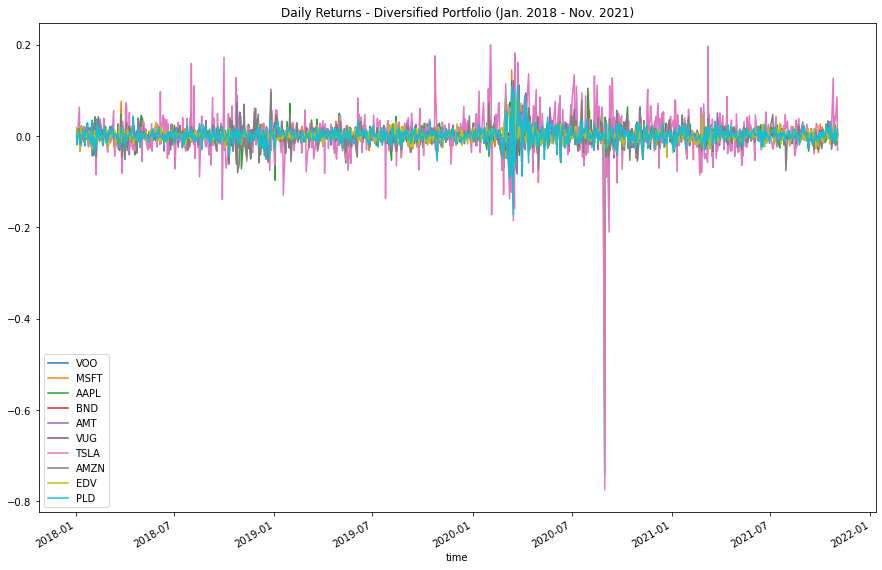

In [21]:
# Plot daily returns for the Diversified Portfolio
diversified_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)")

In [ ]:
# Plot the cumulative returns for the Diversified Portfolio
diversified_cumulative_returns_df.plot(figsize=(15,10), title="Cumulative Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)")